In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import pickle

In [17]:
total_data=pd.read_csv("../data/interim/dataset_binario.csv")

print(total_data.shape)

total_data.info()

(74126, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74126 entries, 0 to 74125
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          74126 non-null  int64  
 1   title                       74126 non-null  object 
 2   company_display_name        73779 non-null  object 
 3   contract_time               16762 non-null  object 
 4   salary_min                  74111 non-null  float64
 5   salary_max                  73917 non-null  float64
 6   created                     74126 non-null  int64  
 7   latitude                    70528 non-null  float64
 8   longitude                   70528 non-null  float64
 9   redirect_url                74126 non-null  object 
 10  description_full            74125 non-null  object 
 11  remote                      74126 non-null  int64  
 12  permanent_contract          74126 non-null  int64  
 13  freelance          

In [18]:
if total_data.drop("id", axis = 1).duplicated().sum() > 0:
    total_data.drop_duplicates(subset = total_data.columns.difference(['id']))

print(total_data.shape)

(74126, 36)


In [19]:
total_data.drop(["id", "salary_min", "salary_max", "latitude", "longitude", "redirect_url", "description_full","title","3", "county", "city"], axis = 1, inplace = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74126 entries, 0 to 74125
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   company_display_name        73779 non-null  object 
 1   contract_time               16762 non-null  object 
 2   created                     74126 non-null  int64  
 3   remote                      74126 non-null  int64  
 4   permanent_contract          74126 non-null  int64  
 5   freelance                   74126 non-null  int64  
 6   bonuses                     74126 non-null  int64  
 7   career_development          74126 non-null  int64  
 8   immediate_start             74126 non-null  int64  
 9   startup                     74126 non-null  int64  
 10  multinational               74126 non-null  int64  
 11  consulting_or_outsourcing   74126 non-null  int64  
 12  experience_gt_5             74126 non-null  int64  
 13  higher_education            741

## Análisis de variables univariante

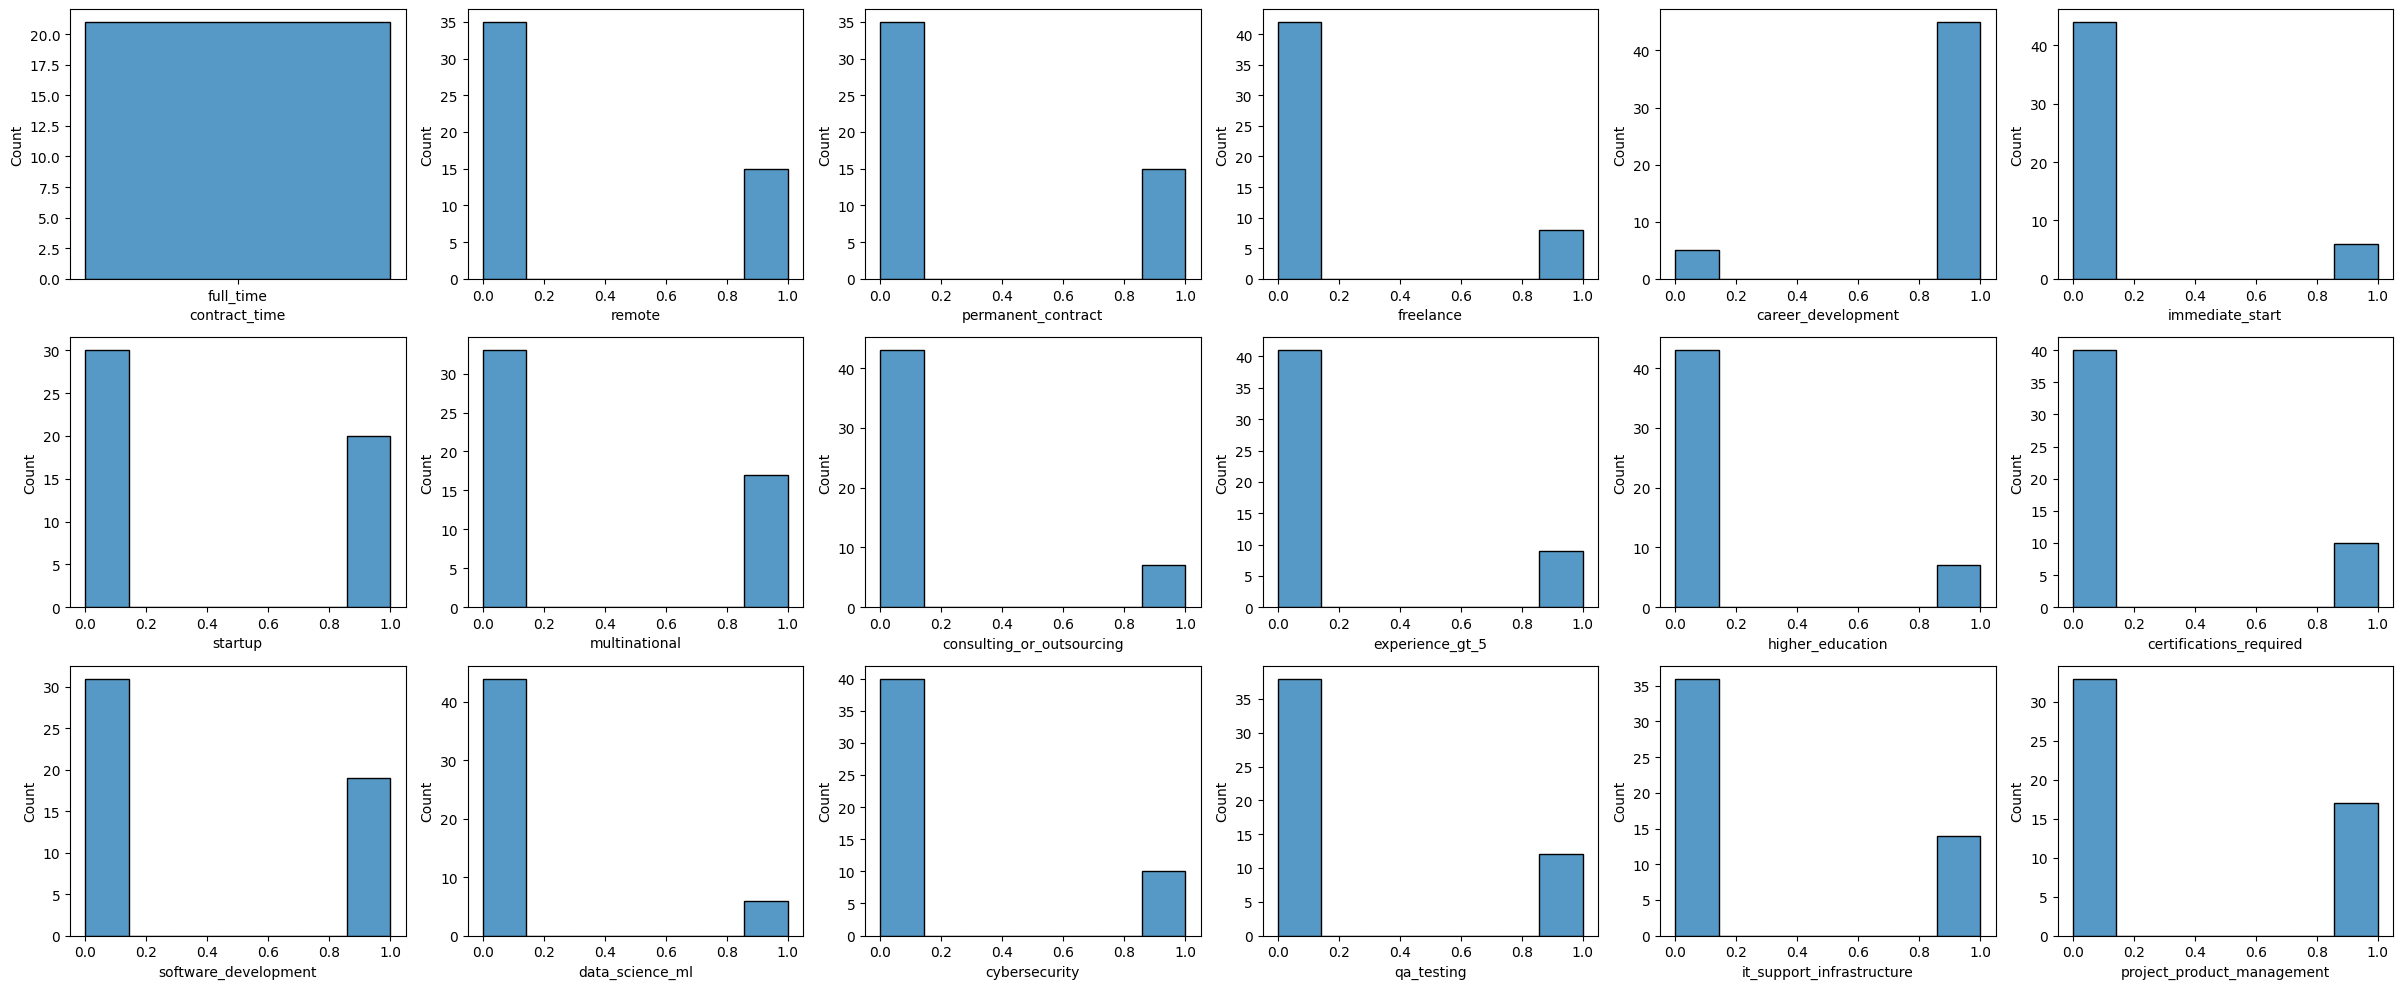

In [ ]:
fig, axis = plt.subplots(3, 6, figsize=(24, 10))  # 3 filas y 6 columnas


sns.histplot(ax = axis[0, 0], data = total_data, x = "contract_time")
sns.histplot(ax = axis[0, 1], data = total_data, x = "remote")
sns.histplot(ax = axis[0, 2], data = total_data, x = "permanent_contract")
sns.histplot(ax = axis[0, 3], data = total_data, x = "freelance")
sns.histplot(ax = axis[0, 4], data = total_data, x = "career_development")
sns.histplot(ax = axis[0, 5], data = total_data, x = "immediate_start")

sns.histplot(ax = axis[1, 0], data = total_data, x = "startup")
sns.histplot(ax = axis[1, 1], data = total_data, x = "multinational")
sns.histplot(ax = axis[1, 2], data = total_data, x = "consulting_or_outsourcing")
sns.histplot(ax = axis[1, 3], data = total_data, x = "experience_gt_5")
sns.histplot(ax = axis[1, 4], data = total_data, x = "higher_education")
sns.histplot(ax = axis[1, 5], data = total_data, x = "certifications_required")

sns.histplot(ax = axis[2, 0], data = total_data, x = "software_development")
sns.histplot(ax = axis[2, 1], data = total_data, x = "data_science_ml")
sns.histplot(ax = axis[2, 2], data = total_data, x = "cybersecurity")
sns.histplot(ax = axis[2, 3], data = total_data, x = "qa_testing")
sns.histplot(ax = axis[2, 4], data = total_data, x = "it_support_infrastructure")
sns.histplot(ax = axis[2, 5], data = total_data, x = "project_product_management")

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()



In [ ]:
total_data["contract_time"] = pd.factorize(total_data["contract_time"])[0]
total_data["state"] = pd.factorize(total_data["state"])[0]
total_data["created"] = pd.factorize(total_data["created"])[0]
total_data["company_display_name"] = pd.factorize(total_data["company_display_name"])[0]
total_data["seniority"] = pd.factorize(total_data["seniority"])[0]

In [21]:
total_data.to_csv('../data/interim/dataset_binario_eda.csv', index=False)

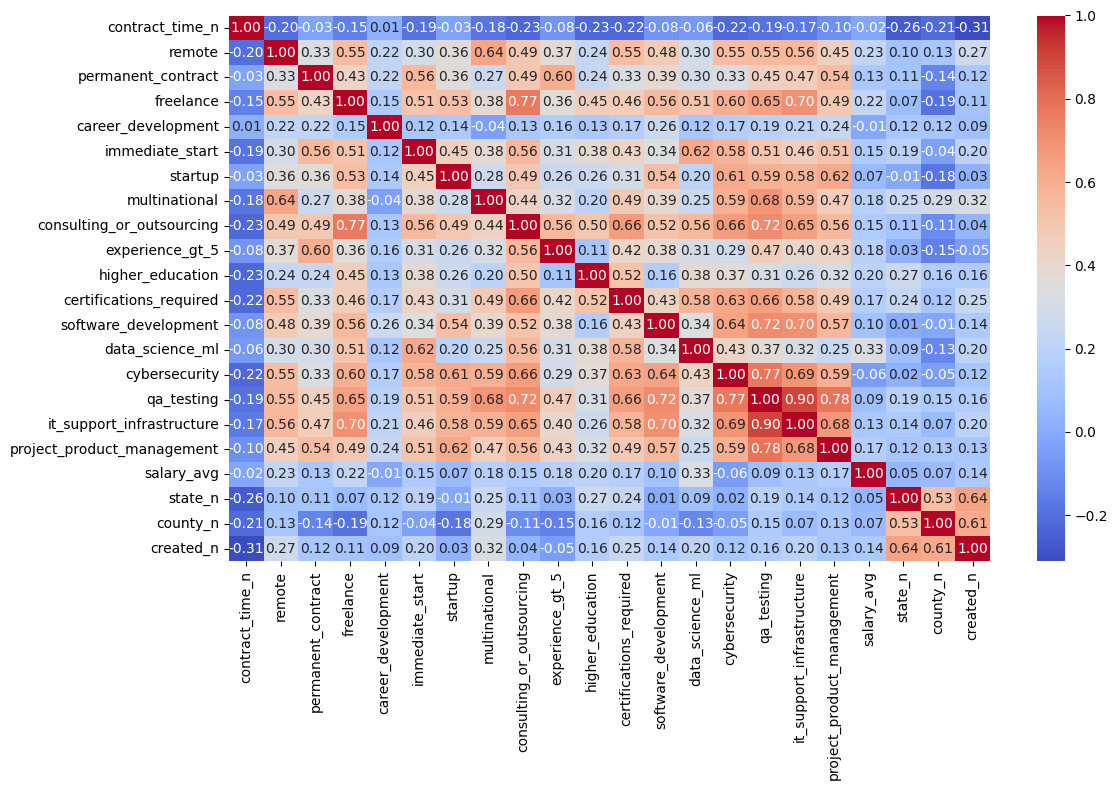

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para la correlación
cols_for_corr = [
    "contract_time_n", "remote", "permanent_contract", "freelance", "career_development", 
    "immediate_start", "startup", "multinational", "consulting_or_outsourcing", 
    "experience_gt_5", "higher_education", "certifications_required", "software_development", 
    "data_science_ml", "cybersecurity", "qa_testing", "it_support_infrastructure", 
    "project_product_management", "salary_avg", "state_n", "county_n", "created_n"
]

# Calcular la correlación entre las columnas seleccionadas
corr_matrix = total_data[cols_for_corr].corr()

# Crear el heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el heatmap
plt.show()


In [17]:
total_data.isnull().sum().sort_values(ascending=False)

contract_time                 29
city                          11
county                         7
title                          0
remote                         0
permanent_contract             0
company_display_name           0
created                        0
career_development             0
immediate_start                0
startup                        0
multinational                  0
consulting_or_outsourcing      0
experience_gt_5                0
freelance                      0
bonuses                        0
certifications_required        0
higher_education               0
software_development           0
data_science_ml                0
it_support_infrastructure      0
project_product_management     0
cybersecurity                  0
qa_testing                     0
salary_avg                     0
ux_ui_design                   0
state                          0
seniority                      0
contract_time_n                0
state_n                        0
county_n  